In [1]:
%matplotlib inline

In [2]:
from keras import datasets
from keras.utils import np_utils

In [3]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    L, W, H, C = X_train.shape
    X_train = X_train.reshape(-1, W * H * C)
    X_test = X_test.reshape(-1, W * H * C)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)

In [4]:
from keras import layers, models

In [5]:
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Pd_l, Nout):
        super(DNN, self).__init__()

        self.add(
            layers.Dense(Nh_l[0], activation='relu', input_shape=(Nin, ), name='Hidden-1')
        )
        self.add(
            layers.Dropout(Pd_l[0])
        )
        self.add(
            layers.Dense(Nh_l[1], activation='relu', name='Hidden-2')
        )
        self.add(
            layers.Dropout(Pd_l[1])
        )
        self.add(
            layers.Dense(Nout, activation='softmax')
        )

        self.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['acc']
        )

In [6]:
import matplotlib.pyplot as plt

In [7]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train, Test'], loc=0)

In [8]:
def plot_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train, Test'], loc=0)

In [9]:
def main(Pd_l):
    (X_train, y_train), (X_test, y_test) = Data_func()

    Nin = X_train.shape[1]
    Nh_l = [100, 50]
    # Pd_l = [0.02, 0.5]
    number_of_class = 10
    Nout = number_of_class

    model = DNN(Nin, Nh_l, Pd_l, Nout)

    history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.2)

    performance_test = model.evaluate(X_test, y_test)
    print(f'Test loss and accuracy -> {performance_test}')

    plot_loss(history)
    plt.show()

    plot_acc(history)
    plt.show()

Epoch 1/10
400/400 [==============================] - 1s 3ms/step - loss: 2.1353 - acc: 0.1982 - val_loss: 1.9491 - val_acc: 0.2990

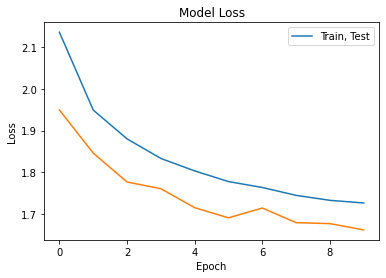

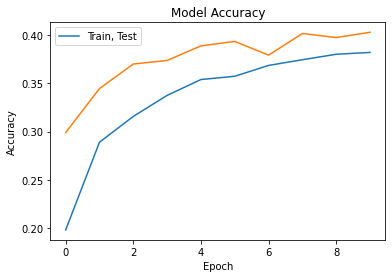

In [10]:
Pd_l = [0.02, 0.5]
main(Pd_l)

Epoch 1/10
400/400 [==============================] - 2s 4ms/step - loss: 2.1712 - acc: 0.1793 - val_loss: 1.9584 - val_acc: 0.2736

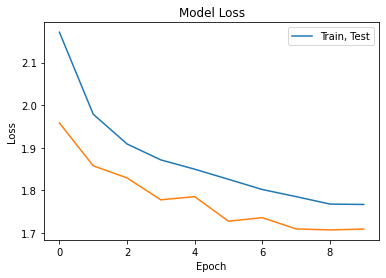

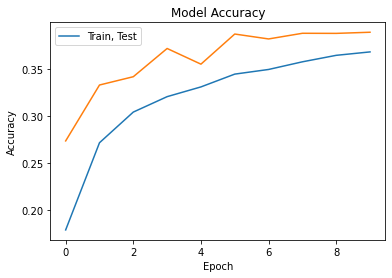

In [11]:
Pd_l = [0.05, 0.5]
main(Pd_l)

Epoch 1/10
400/400 [==============================] - 2s 5ms/step - loss: 1.9233 - acc: 0.3096 - val_loss: 1.8490 - val_acc: 0.3270

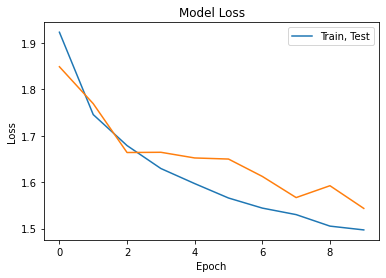

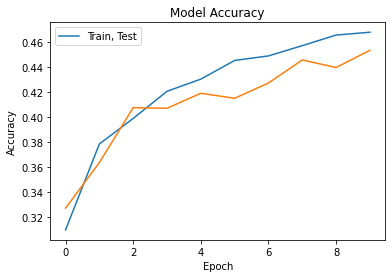

In [12]:
Pd_l = [0.0, 0.0]
main(Pd_l)